In [1]:
import numpy as np

Linear Regression

In [4]:
class Linear_Regression:

  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self,X,Y):
    #number of training examples & number of features
    self.m , self.n = X.shape

    #intialising the weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    #implementing gradient descent
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self,):
    Y_prediction = self.predict(self.X)
    #calculate gradients
    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m

    #update weights
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self,X):
    return X.dot(self.w) + self.b

Using the Linear Regression Model

In [22]:
# importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Processing

In [5]:
# loading the data to pandas dataframe
salary_data = pd.read_csv('/content/salary_data.csv')

In [6]:
salary_data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [7]:
# checking for missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [8]:
# stastical analysis of the data
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Splitting the feature and Target

In [9]:
X = salary_data.drop(columns='Salary',axis=1)
Y = salary_data['Salary']

In [10]:
print(X)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [11]:
print(Y)

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64


Train - Test Split

In [31]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(30, 1) (21, 1) (9, 1)


In [38]:
model = Linear_Regression(learning_rate=0.01,no_of_iterations=2000)

In [39]:
model.fit(X_train,Y_train)

In [40]:
print("weight",model.w[0])
print("bias",model.b)

weight 9534.962785826707
bias 23735.772258929996


<ipython-input-40-fadda424eaca>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("weight",model.w[0])


Predicting the Salary

In [41]:
test_data_pred = model.predict(X_test)

In [42]:
print(test_data_pred)

1      36131.223881
0      34224.231323
14     66643.104795
9      59015.134566
21     91434.008038
19     80945.548974
23    101922.467103
6      52340.660616
3      42805.697831
dtype: float64


Visualising the predicted values & actual values

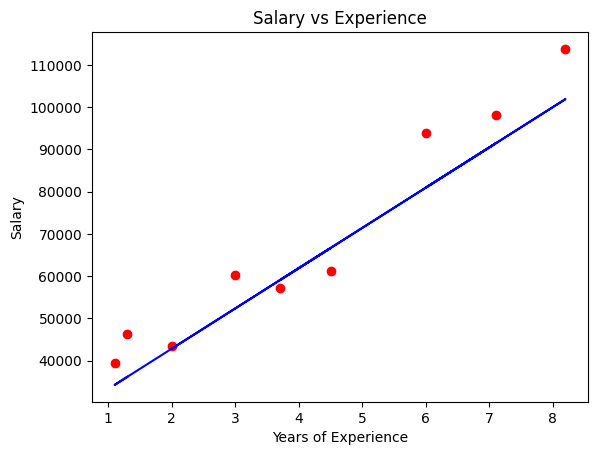

In [43]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_pred, color = 'blue')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()